In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder,normalize
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from sklearn import metrics

from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("/content/heart_disease_data.csv",index_col = 0)
df.head(20)

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,,,,,,,,,,,,,
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
52,1,2,172,199,1,1,162,0,0.5,2,0,3,1


In [3]:
df.shape


(303, 13)

In [4]:
df['target'].value_counts()


target
1    165
0    138
Name: count, dtype: int64

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 63 to 57
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       303 non-null    int64  
 1   cp        303 non-null    int64  
 2   trestbps  303 non-null    int64  
 3   chol      303 non-null    int64  
 4   fbs       303 non-null    int64  
 5   restecg   303 non-null    int64  
 6   thalach   303 non-null    int64  
 7   exang     303 non-null    int64  
 8   oldpeak   303 non-null    float64
 9   slope     303 non-null    int64  
 10  ca        303 non-null    int64  
 11  thal      303 non-null    int64  
 12  target    303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 33.1 KB


In [6]:
df.isnull().sum()

sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.groupby('c').mean()


,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,
0,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


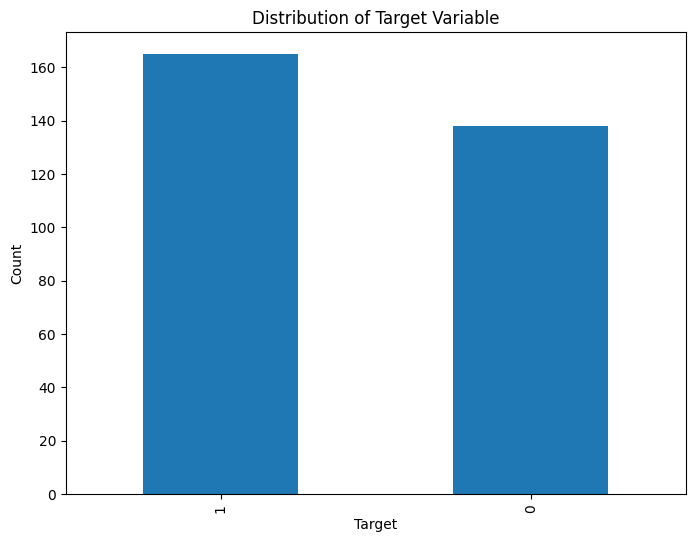

In [9]:
plt.figure(figsize=(8, 6))
df['target'].value_counts().plot(kind='bar')
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()


In [12]:
XSample=df.copy()
XSample=XSample.drop(["target"],axis=1) #satisfaction skor XSample da olmaması lazım diye sildik çünkü (o ySample da)
ySample=df.iloc[:,12]
print(XSample.shape)
print(ySample.shape)

(303, 12)
(303,)


               sex        cp  trestbps      chol       fbs   restecg  \
sex       1.000000 -0.049353 -0.056769 -0.197912  0.045032 -0.058196   
cp       -0.049353  1.000000  0.047608 -0.076904  0.094444  0.044421   
trestbps -0.056769  0.047608  1.000000  0.123174  0.177531 -0.114103   
chol     -0.197912 -0.076904  0.123174  1.000000  0.013294 -0.151040   
fbs       0.045032  0.094444  0.177531  0.013294  1.000000 -0.084189   
restecg  -0.058196  0.044421 -0.114103 -0.151040 -0.084189  1.000000   
thalach  -0.044020  0.295762 -0.046698 -0.009940 -0.008567  0.044123   
exang     0.141664 -0.394280  0.067616  0.067023  0.025665 -0.070733   
oldpeak   0.096093 -0.149230  0.193216  0.053952  0.005747 -0.058770   
slope    -0.030711  0.119717 -0.121475 -0.004038 -0.059894  0.093045   
ca        0.118261 -0.181053  0.101389  0.070511  0.137979 -0.072042   
thal      0.210041 -0.161736  0.062210  0.098803 -0.032019 -0.011981   
target   -0.280937  0.433798 -0.144931 -0.085239 -0.028046  0.13

<Axes: >

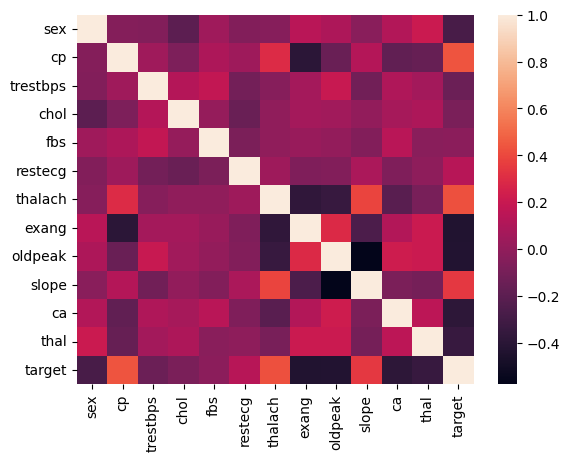

In [13]:
numerical_df = df.select_dtypes(include=['float', 'int'])
print(numerical_df.corr())
sns.heatmap(numerical_df.corr())

In [14]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

ySample = le.fit_transform(ySample)
print(ySample)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in XSample:
  XSample[column] = le.fit_transform(XSample[column])

print(XSample)


     sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
age                                                                          
63     1   3        31    64    1        0       49      0       22      0   
37     1   2        22    80    0        1       84      0       32      0   
41     0   1        22    35    0        0       71      0       14      2   
56     1   1        14    67    0        1       76      0        8      2   
57     0   0        14   145    0        1       62      1        6      2   
..   ...  ..       ...   ...  ...      ...      ...    ...      ...    ...   
57     0   0        28    71    0        1       23      1        2      1   
45     1   3         8    93    0        1       32      0       12      1   
68     1   0        30    26    1        1       40      0       31      1   
57     1   0        22     1    0        1       16      1       12      1   
57     0   1        22    67    0        0       73      0      

In [16]:
from sklearn.model_selection import train_test_split
XTrain,XTest,yTrain,yTest = train_test_split(XSample,ySample,test_size=0.2,random_state=42)
print(XTrain.shape)
print(XTest.shape)
print(yTrain.shape)
print(yTest.shape)

(242, 12)
(61, 12)
(242,)
(61,)


In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
XTrain =sc.fit_transform(XTrain)
XTest = sc.fit_transform(XTest)
print(XTrain)
print(XTest)

[[ 0.72250438  0.00809909 -0.69836226 ...  0.95390513 -0.68970073
  -0.50904773]
 [ 0.72250438 -0.97189094  1.25430864 ...  0.95390513 -0.68970073
   1.17848036]
 [ 0.72250438  0.98808912  1.25430864 ... -0.69498803 -0.68970073
  -0.50904773]
 ...
 [ 0.72250438  1.96807914  1.74247636 ... -0.69498803  0.32186034
  -0.50904773]
 [ 0.72250438 -0.97189094 -0.69836226 ...  0.95390513 -0.68970073
   1.17848036]
 [-1.38407465  0.00809909  0.66850737 ...  0.95390513  1.33342142
  -0.50904773]]
[[ 0.5204165  -0.81722423  0.85440104  0.84227234 -0.54577682 -0.86189161
  -1.54638147  1.28536917 -0.38814559 -0.48574449  0.07315072 -2.00597821]
 [ 0.5204165   2.00451227  1.5884639   1.05480022 -0.54577682 -0.86189161
   0.46252394 -0.77798661 -0.7337935  -0.48574449 -0.81928803  0.94256808]
 [ 0.5204165   1.06393343  0.85440104 -1.92058999  1.83225076  1.1602387
   1.08751674 -0.77798661 -0.7337935   1.07375098  0.07315072  0.94256808]
 [-1.92153785 -0.81722423 -0.06317754  2.03774162 -0.54577682 

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(XTrain, yTrain)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(XTest)
print("Accuracy on test set: ", accuracy_score(yTest, y_pred))


Best parameters found:  {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best accuracy score:  0.8346938775510203
Accuracy on test set:  0.8688524590163934


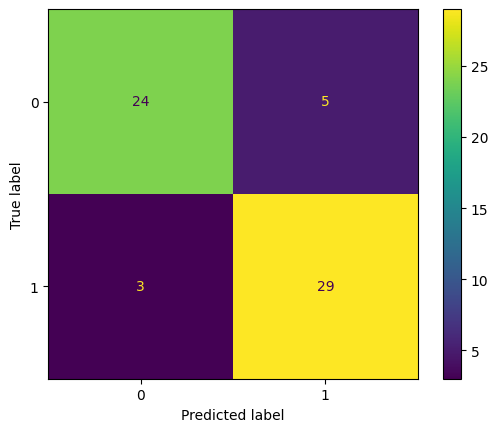

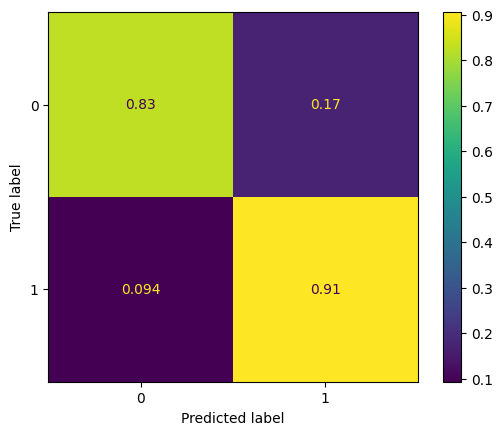

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(yTest, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
disp_normalized = ConfusionMatrixDisplay(confusion_matrix=cm_normalized)
disp_normalized.plot()
plt.show()
